# Non-convex inverse problems project: Sparse PCA
##### Yago Aguado, M2 MASH

In [32]:
#Modules
import numpy as np
from random import sample
import cvxpy as cp
import matplotlib.pyplot as plt 


#### Question 1

In [ ]:
# Question 1: code a function generating an instance of the problem

def simulation(k, m, n):
    # Sample the lists of non-zero indices
    l = range(n) #indices are those in python
    s1 = sample(l, k)
    s2 = sample(l, k)
    
    # Create the vectors forming x
    u = np.zeros(n)
    v = np.zeros(n)
    
    u[s1] = np.random.random(k)
    v[s2] = np.random.random(k)
    # Compute x
    X = np.outer(u, v)
    
    # Generate the random matrices A_i
    lA = []
    ly = []
    for i in range(m):
        A = np.random.uniform(0, 1, (n,n))
        y = np.trace(A.T @ X) #Frobenius product
        lA.append(A)
        ly.append(y)
    
    return X, s1, s2, lA, ly
        
    

#### Question 3

In [119]:
# Question 3: let us implement a solver for the convex approach

def solver(lbda, lA, ly, n, m):
    # Define the problem
    X = cp.Variable((n, n))
    constraints =[cp.trace(lA[k].T @ X) == ly[k] for k in range(m)]
    objective = cp.Minimize(cp.norm(X,"nuc") + lbda * cp.pnorm(X, p = 1))
    problem = cp.Problem(objective,constraints)

    # Solve it
    problem.solve(solver=cp.SCS,verbose=False)
    return X.value

def error(X, s1, s2, z):
    n = np.shape(X)[0]
    min = np.abs(X[s1[0], s2[0]])
    for i in s1:
        for j in s2:
            if np.abs(X[i, j])< min:
                min = np.abs(X[i, j])
    
    err = 0
    for i in range(n):
        for j in range(n):
            if i in s1 and j in s2:
                if z[i, j] < min/10:
                    err += 1
            else:
                if z[i, j] > min/10:
                    err += 1
    
    return err

In [114]:
# Testing the code
lbda = 0.1

for i in range(2,25):
    X, s1, s2, lA, ly = simulation(2, i, 4)
    Z = solver(lbda, lA, ly, 4, i)
    print(error(X, s1, s2, Z))


8
0
5
10
7
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0


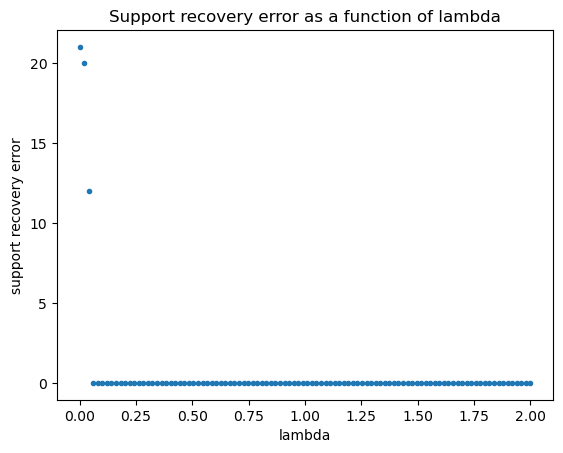

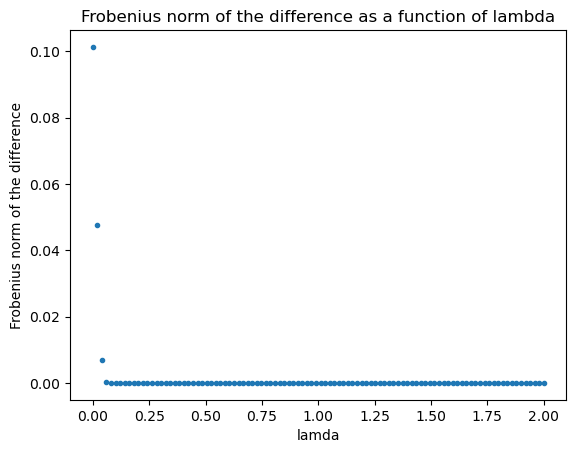

In [123]:
# Plots for the recovery error as a function of lambda
k = 3
m = 20
n = 6

errors = []
norms = []
X, s1, s2, lA, ly = simulation(k, m, n)
lmbdas = np.linspace(0, 2, 100)
for lbda in lmbdas:
    Z = solver(lbda, lA, ly, n, m)
    errors.append(error(X, s1, s2, Z))
    norms.append(np.linalg.norm(X-Z, 'fro'))

plt.plot(lmbdas, errors, ".")
plt.xlabel("lambda")
plt.ylabel("support recovery error")
plt.title("Support recovery error as a function of lambda")
plt.show()

plt.plot(lmbdas, norms, ".")
plt.xlabel("lamda")
plt.ylabel("Frobenius norm of the difference")
plt.title("Frobenius norm of the difference as a function of lambda")
plt.show()
    

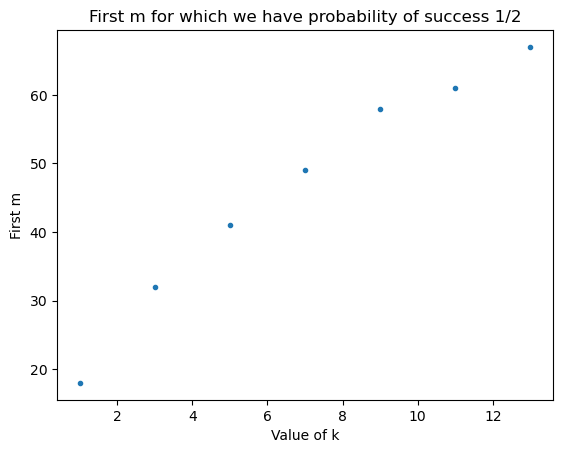

In [124]:
n = 20
lbda = 0.2
listm = []
for k in range(1, 14, 2):
    stopCond = True
    m = 0
    while stopCond and m<400:
        ct = 0
        for i in range(20):
            X, s1, s2, lA, ly = simulation(k, m, n)
            Z = solver(lbda, lA, ly, n, m)
            if error(X, s1, s2, Z) == 0:
                ct +=1
        if ct >=10:
            stopCond = False
            listm.append(m)
        m+=1

ks = range(1, 14, 2)
plt.plot(ks, listm, ".")
plt.title("First m for which we have probability of success 1/2")
plt.xlabel("Value of k")
plt.ylabel("First m")
plt.show()

In [125]:
#Define a solving function for objective F2
def alt_solver(lA, ly, n, m):
    # Define the problem
    X = cp.Variable((n, n))
    constraints =[cp.trace(lA[k].T @ X) == ly[k] for k in range(m)]
    objective = cp.Minimize(cp.pnorm(X, p = 1))
    problem = cp.Problem(objective,constraints)

    # Solve it
    problem.solve(solver=cp.SCS,verbose=False)
    return X.value

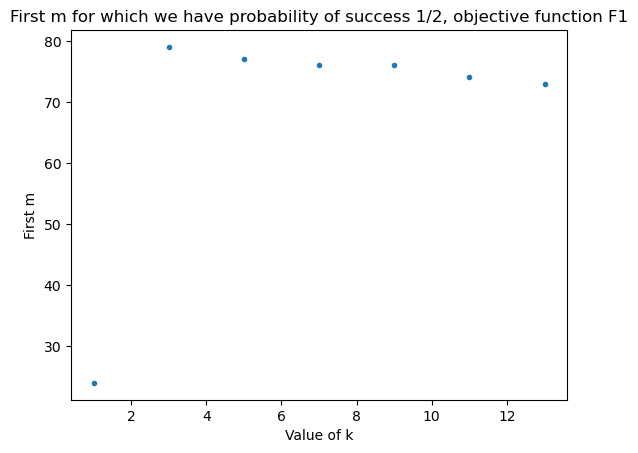

In [126]:
# Simulation for only F1
n = 20
lbda = 0
listm = []
for k in range(1, 14, 2):
    stopCond = True
    m = 0
    while stopCond and m<400:
        ct = 0
        for i in range(20):
            X, s1, s2, lA, ly = simulation(k, m, n)
            Z = solver(lbda, lA, ly, n, m)
            if error(X, s1, s2, Z) == 0:
                ct +=1
        if ct >=10:
            stopCond = False
            listm.append(m)
        m+=1

ks = range(1, 14, 2)
plt.plot(ks, listm, ".")
plt.title("First m for which we have probability of success 1/2, objective function F1")
plt.xlabel("Value of k")
plt.ylabel("First m")
plt.show()

c:\Users\yagoa\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


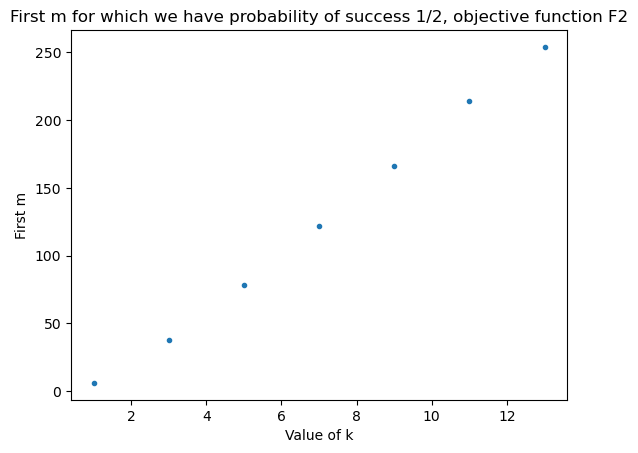

In [129]:
# Simulation for only F2
n = 20
listm = []
for k in range(1, 14, 2):
    stopCond = True
    m = 0
    while stopCond and m<400:
        ct = 0
        for i in range(20):
            X, s1, s2, lA, ly = simulation(k, m, n)
            Z = alt_solver(lA, ly, n, m)
            if error(X, s1, s2, Z) == 0:
                ct +=1
        if ct >=10:
            stopCond = False
            listm.append(m)
        m+=1

ks = range(1, 14, 2)
plt.plot(ks, listm, ".")
plt.title("First m for which we have probability of success 1/2, objective function F2")
plt.xlabel("Value of k")
plt.ylabel("First m")
plt.show()

#### Question 4

In [153]:
# Recover S1, S2 from Z

# The function is far from optimal, but it fulfils its purpose
def find_indices(Z, k):
    n = Z.shape[0]
    s1 = []
    s2 = []
    non_zero_vals= []
    for i in range(n):
        for j in range(n):
            if abs(Z[i, j]) > 0.001:
                non_zero_vals.append(abs(Z[i, j]))

    non_zero_vals.sort(reverse = True)
    max_vals = non_zero_vals[:k]
    
    for i in range(n):
        for j in range(n):
            if abs(Z[i, j]) in max_vals:
                s1.append(i)
                s2.append(j)
    return s1, s2


# Recover X from S1 and S2
def recover_from_guess(Z, s1, s2):
    Z_rest = np.zeros((k,k))
    for i in range(len(s1)):
        for j in range(len(s2)):
            Z_rest[i, j] = Z[s1[i], s2[j]]
    U, S, V = np.linalg.svd(Z_rest)
    U = U[:, 0]*np.sqrt(S[0])
    V = V[:, 0]*np.sqrt(S[0])
    
    
    u = np.zeros(n)
    v = np.zeros(n)
    for i in range(len(s1)):
        u[s1[i]] = U[i]
        v[s2[i]] = V[i]
        
    return u, v

def noncv_solver(lA, ly, n, m, k):
    Z = np.zeros((n,n))
    for i in range(n):
        Z += ly[i]*lA[i]
    Z = Z/m
    
    s1, s2 = find_indices(Z, k)
    u, v = recover_from_guess(Z, s1, s2)
    
    return u, v, s1, s2 

In [156]:
# Now we test this algorithm

def is_basis_right(s1, s2, c1, c2):
    return s1 == c1 and s2 == c2

n = 10
k = 4
correct_basis = 0
incorrect_basis = 0
errors = []
norms = []


for l in range(10):
    for m in range(10, 120, 10):
        X, s1, s2, lA, ly = simulation(k, m, n)
        u, v, c1, c2 = noncv_solver(lA, ly, n, m, k)
        errors.append(error(X, s1, s2, Z))
        norms.append(np.linalg.norm(X-np.outer(u, v), 'fro'))
        if is_basis_right(s1, s2, c1, c2):
            correct_basis +=1
        else:
            incorrect_basis += 1 

In [157]:
print(norms)
print(errors)
print(correct_basis)

[4.715271815051446, 1.9147561975093286, 1.9852194245834058, 0.7149068738654155, 1.4127905491712431, 1.3159417999869623, 1.2807414366848406, 1.9453135420864647, 1.9122329941457825, 1.429385529513522, 1.0876686990004385, 5.5634034877305005, 4.214665060699985, 0.8657887551318197, 0.726171483639088, 1.1971876905290135, 2.06401596014077, 1.7903014511730306, 1.436526864853104, 1.3964893187049223, 1.063786870444602, 1.6739952351021228, 6.923988039166966, 2.3962903295903746, 1.7274762834248722, 2.930044280054535, 2.1873386848231378, 1.5279899204634735, 1.3159583326018074, 2.250874480198464, 1.423603401010439, 0.8578164074676295, 0.8546707881887428, 3.675976058112751, 1.9742767169332351, 2.3889445852174043, 1.2868341897271152, 0.5369175250465521, 0.45915671099032007, 0.8461278297629821, 0.6405889770520033, 1.2762051863678485, 1.229166090393037, 1.896498671024072, 1.7332036656918186, 1.8772449868882666, 1.4316984634176255, 2.0705746385561805, 1.475314835112569, 1.3505905993544443, 1.424211393376